# **Personality Test Project Using R**
### Analysing students behaviour and buidling predictions to provide better service to college counselors


## Obecjtive:

The objective of this project is to use linear regression analysis to predict certain behaviors in college students. We aim to identify which variables  can help predict a specific behavior or trait. By analyzing the data, we intend to provide insights that can help the stakeholder of this project, San Francisco County Office of Education and thereby assist them in providing better services to college counselors.

## EDA

We will install the "readxl" and "dplyr" packages in R. These packages are essential to read Excel data & for data manipulation and analysis tasks in our future R code.

In [121]:
install.packages("readxl")
install.packages("dplyr")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [156]:
library(readxl)
library(dplyr)

We will load the 3 data files as 3 dataframes namely df1, df2, df3 to merge them later :

In [157]:
df1 <- read_xlsx("/Class_2023_09_09__17_31_QZ_Personality Test-1.xlsx")
df2 <- read_xlsx("/Class_2023_09_09__17_47_QZ_Personality Test-1.xlsx")
df3 <- read_xlsx("/Class_2023_09_09__18_03_QZ_Personality Test-1.xlsx")

Before merging the datasets, it is important to check if they have same column names as well numbers using conditionals as below :

In [158]:
if (all(names(df1) == names(df2)) && all(names(df2) == names(df3)))
{
  cat("Column names are the same in all data frames.\n")
} else {
  cat("Column names are not the same in all data frames.\n")
}

Column names are the same in all data frames.


In [159]:
# Check if the data frames have the same number of columns
if (ncol(df1) == ncol(df2) && ncol(df2) == ncol(df3))
{
  cat("Number of columns is the same in all data frames.\n")
} else {
  cat("Number of columns is not the same in all data frames.\n")
}


Number of columns is the same in all data frames.


In [160]:
#merging 3 dataframes into new datframe using bindrow function
merged_data <- bind_rows(df1, df2, df3)

Checking dimensions of the data using dim()

In [161]:
dim(merged_data)


[1] 114  51

Checking names of the columns to understand more about the dataset

In [162]:
colnames(merged_data)

[1] "You enjoy vibrant social events with lots of peopleYour response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8\r\nBased on https://www.16personalities.com/free-personality-test"                                                                               
 [2] "You often spend time exploring unrealistic yet intriguing ideas.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8\r\nBased on https://www.16personalities.com/free-personality-test"                                                                  
 [3] "Your travel plans are more likely to look like a rough list of ideas than a detailed itinerary.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8\r\nBased on https://www.16personalities.com/free-personality-test"                                   
 [4] "You often think about what you should have said in a conversation long after it has taken place.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8\r\nBased on https://www.16personalities.com/free-personality-test"                                  
 [5] "If your friend is sad about something, your first instinct is to support them emotionally, not try to solve their problem.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8\r\nBased on https://www.16personalities.com/free-personality-test"        
 [6] "People can rarely upset you.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8\r\nBased on https://www.16personalities.com/free-personality-test"                                                                                                      
 [7] "You often rely on other people to be the ones to start a conversation and keep it going.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8\r\nBased on https://www.16personalities.com/free-personality-test"                                          
 [8] "If you have to temporarily put your plans on hold, you make sure it is your top priority to get back on track as soon as possible.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8\r\nBased on https://www.16personalities.com/free-personality-test"
 [9] "You rarely worry if you made a good impression on someone you met.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8\r\nBased on https://www.16personalities.com/free-personality-test"                                                                
[10] "It would be a challenge for you to spend the whole weekend all by yourself without feeling bored.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8\r\nBased on https://www.16personalities.com/free-personality-test"                                 
[11] "You are more of a detail-oriented than a big picture person.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8\r\nBased on https://www.16personalities.com/free-personality-test"                                                                      
[12] "You are very affectionate with people you care about.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8\r\nBased on https://www.16personalities.com/free-personality-test"                                                                             
[13] "You have a careful and methodical approach to life.Your response should be a decimal number from 1 (strongly disagree) to 10 (strongly agree), for example 3.8\r\nBased on https://www.16personalities.com/free-personality-test"                                      

Since the column names are too long, let's substitute them with one word alternative having same meaning. We will create list of such words and replace existing col names with these new col names.

In [163]:
one_word_names <- list(
  "Social",
  "Imaginative",
  "Adventurous",
  "Reflective",
  "Empathetic1",
  "Resilient",
  "Introverted1",
  "Determined",
  "Confident",
  "Sociable1",
  "Detail-Oriented",
  "Affectionate",
  "Methodical",
  "Regretful",
  "Observant",
  "Rational",
  "Calm",
  "Sociable2",
  "Sociable3",
  "Creative",
  "Ruthless",
  "Focused",
  "Insecure1",
  "Introverted2",
  "Pragmatic",
  "Stoic",
  "Sociable4",
  "Futuristic",
  "Emotional",
  "Empirical",
  "Vengeful",
  "Impulsive",
  "Independent",
  "Analytical",
  "Decisive1",
  "Unreflective",
  "Introverted3",
  "Present-Focused",
  "Insensitive",
  "Decisive2",
  "Insecure2",
  "Outgoing",
  "Spontaneous",
  "Moody",
  "Philosophical",
  "Expressive",
  "Forgiving",
  "Realistic",
  "Empathetic2",
  "Emotional2",
  "Self-Assured"
)
colnames(merged_data) <- one_word_names
head(merged_data)

Social,Imaginative,Adventurous,Reflective,Empathetic1,Resilient,Introverted1,Determined,Confident,Sociable1,⋯,Outgoing,Spontaneous,Moody,Philosophical,Expressive,Forgiving,Realistic,Empathetic2,Emotional2,Self-Assured
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5,9,10,6.5,8.5,5,0,10,8,5.5,⋯,7,8,10,6,8.5,10,8,10,10,8.5
4,5.5,5,8,1,8,6,8,8,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,1,7,5,7.5,10,9,2,10,9,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,5,6,6,10,4,4,7,8,5,⋯,7.6,4.2,6.4,9.2,7.9,7.5,5.5,8.9,6.7,6.5
8,9,8,8,8,8,8,8,8,8,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
9,7,6,7,8,8.5,3,7.5,4.5,8.5,⋯,8.5,7.5,8.5,6.5,7.5,6.5,7.5,7.5,3.5,7.5


We will identify missing values in 'merged_data' using 'is.na()', then count rows with missing values using 'rowSums()', and finally print the count of such rows.

In [170]:
missing_values <- is.na(merged_data)

missing_rows_count <- sum(rowSums(missing_values) > 0)

cat("Number of rows with missing values:", missing_rows_count, "\n")


Number of rows with missing values: 74 


since the original dataset has total 112 rows. Out of which 74 rows have missing values. plainly deleting all those rows would affect the sample size & data quality. To overcome this problem, we will set a missing value threshold at 75%. We then count non-missing values in each row and filter to retain rows with less than 75% missing data.

In [171]:
threshold <- 0.75

# Calculate the number of non-missing values in each row
non_missing_counts <- rowSums(!is.na(merged_data))

# Filter the dataset to keep rows with less than 75% missing values
filtered_data <- merged_data[non_missing_counts / ncol(merged_data) >= threshold, ]


cat("Original dataset dimensions:", dim(merged_data), "\n")
cat("Filtered dataset dimensions:", dim(filtered_data), "\n")

head(filtered_data,20)
dim(filtered_data)
colnames(filtered_data)

Original dataset dimensions: 114 51 
Filtered dataset dimensions: 55 51 


Social,Imaginative,Adventurous,Reflective,Empathetic1,Resilient,Introverted1,Determined,Confident,Sociable1,⋯,Outgoing,Spontaneous,Moody,Philosophical,Expressive,Forgiving,Realistic,Empathetic2,Emotional2,Self-Assured
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
5,9,10,6.5,8.5,5,0,10,8,5.5,⋯,7,8,10,6,8.5,10,8,10,10,8.5
8,5,6,6,10,4,4,7,8,5,⋯,7.6,4.2,6.4,9.2,7.9,7.5,5.5,8.9,6.7,6.5
9,7,6,7,8,8.5,3,7.5,4.5,8.5,⋯,8.5,7.5,8.5,6.5,7.5,6.5,7.5,7.5,3.5,7.5
8.7,9.6,10,3.7,10,7.6,3.5,2.5,1.3,2.3,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7.7,10,7.7,7.7,5,10,4,7,5,2,⋯,6,7,4,6,2,2,7,5,2,4
1,1,10,5,8,1,10,10,1,10,⋯,8.5,10,2,10,10,10,8,NA,NA,NA
6.5,8,9,10,7,8,8,4.5,8,4,⋯,3,8,7,5,5,9,8,8,8,4
10,9,5,8,7,6,3,8,5,8,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8.5,9,6,9,7,5,8,6,8,5,⋯,10,8,6.5,7.5,8.5,8.5,8,7.5,3.5,6.5


[1] 55 51

[1] "Social"          "Imaginative"     "Adventurous"     "Reflective"     
 [5] "Empathetic1"     "Resilient"       "Introverted1"    "Determined"     
 [9] "Confident"       "Sociable1"       "Detail-Oriented" "Affectionate"   
[13] "Methodical"      "Regretful"       "Observant"       "Rational"       
[17] "Calm"            "Sociable2"       "Sociable3"       "Creative"       
[21] "Ruthless"        "Focused"         "Insecure1"       "Introverted2"   
[25] "Pragmatic"       "Stoic"           "Sociable4"       "Futuristic"     
[29] "Emotional"       "Empirical"       "Vengeful"        "Impulsive"      
[33] "Independent"     "Analytical"      "Decisive1"       "Unreflective"   
[37] "Introverted3"    "Present-Focused" "Insensitive"     "Decisive2"      
[41] "Insecure2"       "Outgoing"        "Spontaneous"     "Moody"          
[45] "Philosophical"   "Expressive"      "Forgiving"       "Realistic"      
[49] "Empathetic2"     "Emotional2"      "Self-Assured"

We will utilize the rowSums() function to calculate the count of missing values in each row of a dataset stored in missing_values1. We will sum those missing values and calculate the count.

In [172]:
missing_values1 <- is.na(filtered_data)

missing_rows_count1 <- sum(rowSums(missing_values1) > 0)

# Print the count of rows with missing values
cat("Number of rows with missing values:", missing_rows_count1, "\n")


Number of rows with missing values: 15 


To do further treatment on missing values, we need to check if the data of columns is all numeric.

In [177]:
# Check if columns have non-numeric data
non_numeric_cols <- sapply(filtered_data, function(col) any(!is.na(as.numeric(col))))

# Print the names of columns with non-numeric data
names(filtered_data)[non_numeric_cols]


[1] "Social"          "Imaginative"     "Adventurous"     "Reflective"     
 [5] "Empathetic1"     "Resilient"       "Introverted1"    "Determined"     
 [9] "Confident"       "Sociable1"       "Detail-Oriented" "Affectionate"   
[13] "Methodical"      "Regretful"       "Observant"       "Rational"       
[17] "Calm"            "Sociable2"       "Sociable3"       "Creative"       
[21] "Ruthless"        "Focused"         "Insecure1"       "Introverted2"   
[25] "Pragmatic"       "Stoic"           "Sociable4"       "Futuristic"     
[29] "Emotional"       "Empirical"       "Vengeful"        "Impulsive"      
[33] "Independent"     "Analytical"      "Decisive1"       "Unreflective"   
[37] "Introverted3"    "Present-Focused" "Insensitive"     "Decisive2"      
[41] "Insecure2"       "Outgoing"        "Spontaneous"     "Moody"          
[45] "Philosophical"   "Expressive"      "Forgiving"       "Realistic"      
[49] "Empathetic2"     "Emotional2"      "Self-Assured"

We will convert all columns in the 'filtered_data' dataframe to numeric data types using the 'as.numeric' function

In [176]:

filtered_data <- as.data.frame(sapply(filtered_data, as.numeric))



We will calculate column means for 'filtered_data', skipping missing values using 'colMeans'. Then, we will loop through columns, replacing NAs with their respective column means. We have handled missing values by this way substituting mean values of respective columns.

In [178]:
# Assuming 'filtered_data' is your dataset with missing values
# You can use the 'colMeans' function to calculate the mean of each column

# Calculate the column means, skipping NA values
column_means <- colMeans(filtered_data, na.rm = TRUE)

# Loop through the columns and replace NAs with the respective column mean
for (col_name in colnames(filtered_data)) {
  filtered_data[is.na(filtered_data[, col_name]), col_name] <- column_means[col_name]
}

# Now, 'filtered_data' contains missing values imputed with column means


In [180]:
#to confirm missing value treatment
head(filtered_data)

,Social,Imaginative,Adventurous,Reflective,Empathetic1,Resilient,Introverted1,Determined,Confident,Sociable1,⋯,Outgoing,Spontaneous,Moody,Philosophical,Expressive,Forgiving,Realistic,Empathetic2,Emotional2,Self-Assured
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5.0,9.0,10.0,6.5,8.5,5.0,0.0,10.0,8.0,5.5,⋯,7.000000,8.00000,10.000000,6.000000,8.500000,10.000000,8.000000,10.00000,10.000,8.5000
2,8.0,5.0,6.0,6.0,10.0,4.0,4.0,7.0,8.0,5.0,⋯,7.600000,4.20000,6.400000,9.200000,7.900000,7.500000,5.500000,8.90000,6.700,6.5000
3,9.0,7.0,6.0,7.0,8.0,8.5,3.0,7.5,4.5,8.5,⋯,8.500000,7.50000,8.500000,6.500000,7.500000,6.500000,7.500000,7.50000,3.500,7.5000
4,8.7,9.6,10.0,3.7,10.0,7.6,3.5,2.5,1.3,2.3,⋯,6.185106,6.66087,5.713043,6.431111,5.409091,6.027907,6.269767,6.75439,4.979,5.6025
5,7.7,10.0,7.7,7.7,5.0,10.0,4.0,7.0,5.0,2.0,⋯,6.000000,7.00000,4.000000,6.000000,2.000000,2.000000,7.000000,5.00000,2.000,4.0000
6,1.0,1.0,10.0,5.0,8.0,1.0,10.0,10.0,1.0,10.0,⋯,8.500000,10.00000,2.000000,10.000000,10.000000,10.000000,8.000000,6.75439,4.979,5.6025


We will load the 'corrplot' library and use it to create a graphical representation of a correlation matrix. This plot will display correlations in a color-based format, cluster columns and rows, and adjust label properties, with an optional title added.

In [ ]:
install.packages("corrplot")


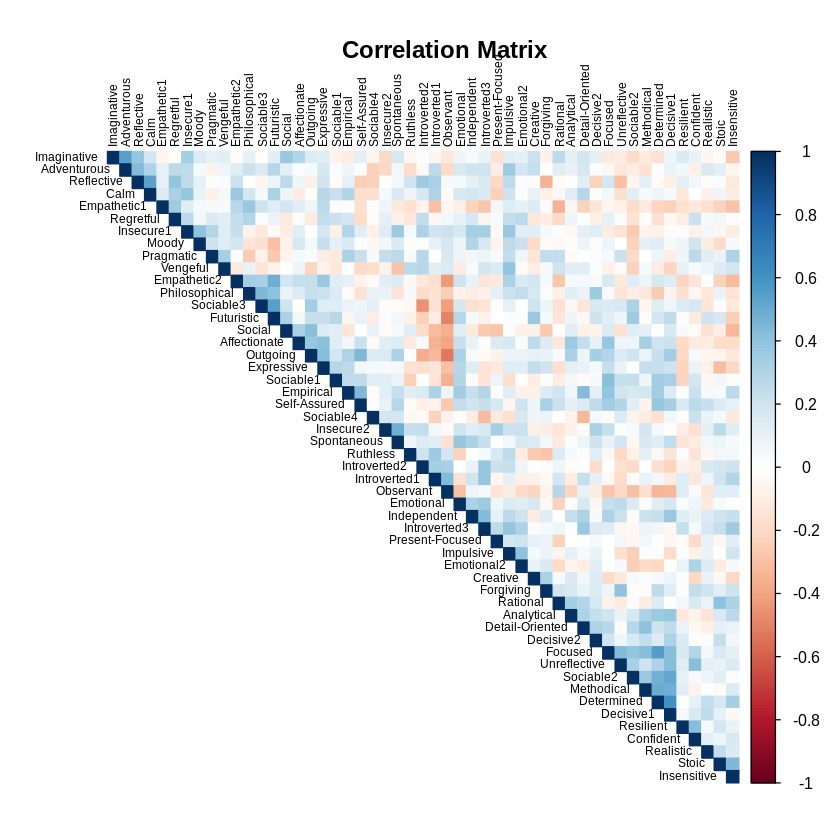

In [139]:
library(corrplot)

# Create a correlation matrix
correlation_matrix <- cor(filtered_data)

corrplot(correlation_matrix,
         method = "color",          # Use color-based representation
         type = "upper",            # Display upper triangle of the matrix
         order = "hclust",         # Cluster columns and rows
         tl.col = "black",         # Label color
         tl.srt = 90,              # Rotate labels by 90 degrees
         tl.cex = 0.6             # Adjust text size
)

title("Correlation Matrix")


## Linear Regression :

**Why We Chose Analytical Ability as the Response Variable:**

We selected "Analytical Ability" as our response variable because it plays a pivotal role in a college student's academic success and personal development.
Analytical ability encompasses critical thinking, problem-solving skills, and the capacity to make informed decisions—qualities that are essential for academic achievement and future career prospects.
By focusing on analytical ability, we aim to provide college counselors with valuable insights into a student's strengths and areas needing improvement, enabling them to offer tailored guidance and support.


**Model 1 : Predicting Analytical ability based on extroverted trait of a student**

We will Create a scatter plot with a regression line to visualize the relationship between "Outgoing" and "Analytical" variables in the data, with the regression line in red colour.


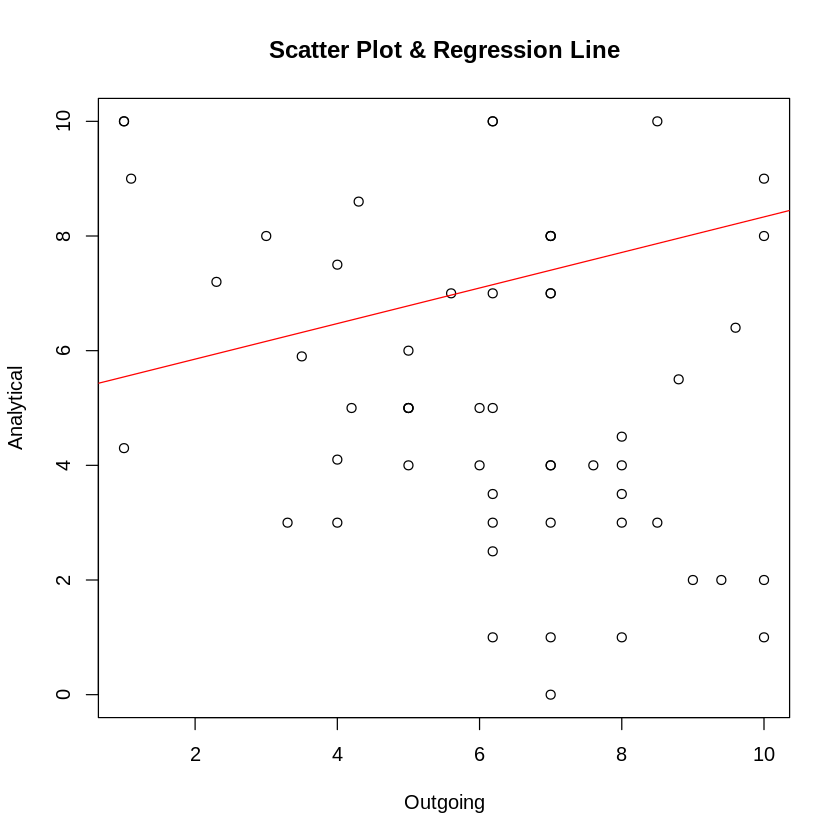

In [191]:
# Fit a linear regression model
model <- lm(Analytical ~ Outgoing, data = filtered_data)

# Plot the scatter plot with the regression line
plot(filtered_data$Outgoing, filtered_data$Introverted1,
     main = "Scatter Plot & Regression Line",
     xlab = "Outgoing", ylab = "Analytical")
abline(model, col = "red")

In [200]:
summary(model)


Call:
lm(formula = Analytical ~ Outgoing, data = filtered_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1509 -0.9385  0.2863  1.5964  3.2166 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.2331     0.8194   6.386 4.37e-08 ***
Outgoing      0.3101     0.1238   2.506   0.0153 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.17 on 53 degrees of freedom
Multiple R-squared:  0.1059,	Adjusted R-squared:  0.08903 
F-statistic: 6.278 on 1 and 53 DF,  p-value: 0.01533


**Model 1 Summary:** We analyzed the relationship between the variable "Analytical" and "Outgoing."

The model shows that for every unit increase in "Outgoing," we expect an increase of 0.3101 in "Analytical."

The model is statistically significant (p-value = 0.0153), indicating that "Outgoing" is a significant predictor of "Analytical."

The R-squared value of 0.1059 suggests that the model explains 10.59% of the variability in "Analytical."

Overall, the model indicates a positive relationship between "Outgoing" and "Analytical."

**Model 2 : Predicting Analytical ability based on Confidence trait of a student**


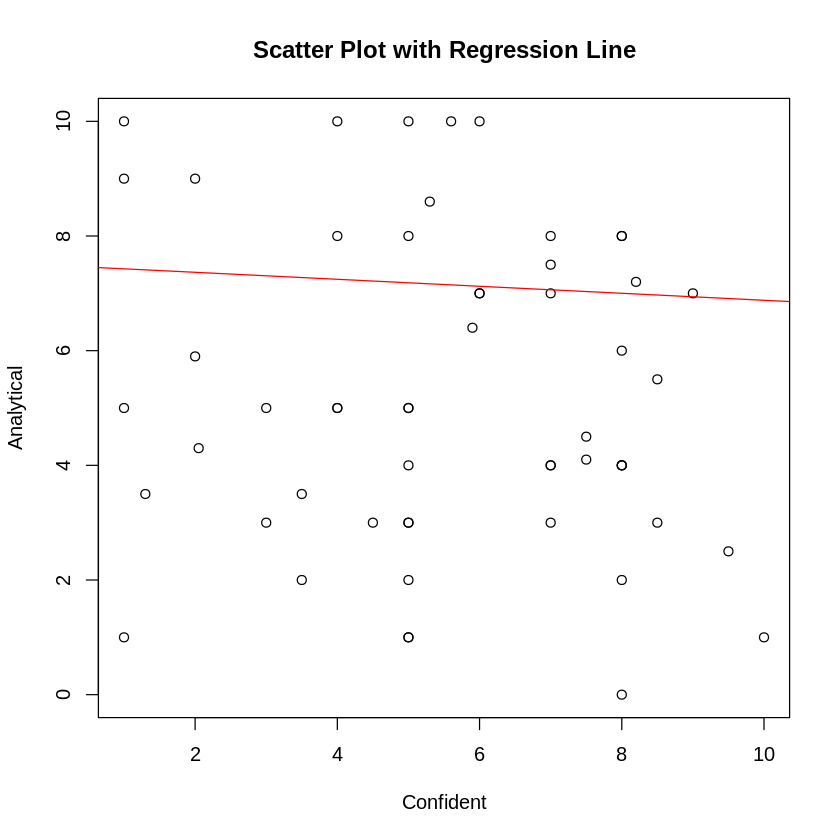

In [204]:
# Fit a linear regression model
model2 <- lm(Analytical ~ Confident, data = filtered_data)

# Plot the scatter plot with the regression line
plot(filtered_data$Confident, filtered_data$Introverted1,
     main = "Scatter Plot with Regression Line",
     xlab = "Confident", ylab = "Analytical")
abline(model2, col = "red")

In [205]:
summary(model2)


Call:
lm(formula = Analytical ~ Confident, data = filtered_data)

Residuals:
   Min     1Q Median     3Q    Max 
-6.122 -1.123  0.430  1.582  3.030 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.48839    0.77858   9.618 3.23e-13 ***
Confident   -0.06099    0.12916  -0.472    0.639    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.29 on 53 degrees of freedom
Multiple R-squared:  0.004189,	Adjusted R-squared:  -0.0146 
F-statistic: 0.2229 on 1 and 53 DF,  p-value: 0.6387


**Model 2 Summary:** We conducted a linear regression analysis to understand the relationship between the "Analytical" trait and "confident" behavior.
The model attempts to predict Analytical scores based on the level of Confidence.
The regression equation is: Analytical = 7.49 - 0.06 * Confident.
The model is not statistically significant (p-value = 0.639), indicating that Confidence does not significantly predict Analytical scores.
The R-squared value is very low (0.0042), suggesting that only a small proportion of the variation in Analytical scores is explained by Confidence.
In summary, Confidence is not a meaningful predictor of Analytical scores in this model.

**Model 3 : Predicting Analytical ability based on imaginitive trait of a student**


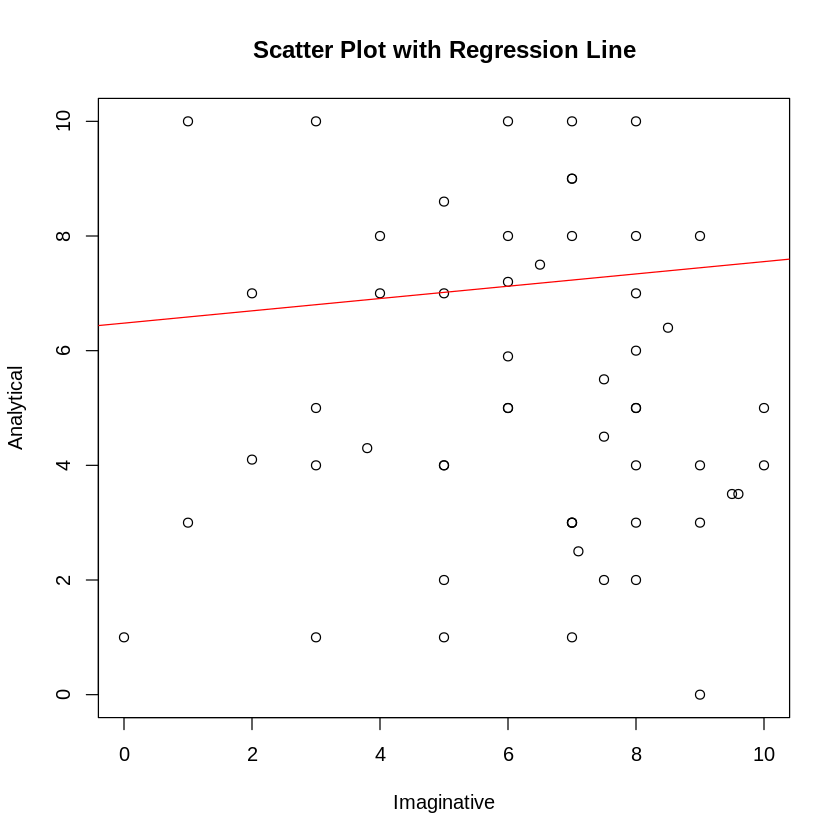

In [193]:
# Fit a linear regression model
model3 <- lm(Analytical ~ Imaginative, data = filtered_data)

# Plot the scatter plot with the regression line
plot(filtered_data$Imaginative, filtered_data$Introverted1,
     main = "Scatter Plot with Regression Line",
     xlab = "Imaginative", ylab = "Analytical")
abline(model3, col = "red")

In [201]:
summary(model3)


Call:
lm(formula = Analytical ~ Imaginative, data = filtered_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8027 -1.2855  0.3046  1.6754  3.4119 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.4808     0.8516   7.610 4.72e-10 ***
Imaginative   0.1073     0.1272   0.844    0.403    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.279 on 53 degrees of freedom
Multiple R-squared:  0.01325,	Adjusted R-squared:  -0.005365 
F-statistic: 0.7118 on 1 and 53 DF,  p-value: 0.4026


**Model 3 Summary:**
We analyzed the relationship between the variable "Analytical" and "Imaginative."
The model does not provide strong evidence of a relationship between "Analytical" and "Imaginative" because the p-value (0.4026) is greater than the typical significance level of 0.05.
The coefficient for "Imaginative" is 0.1073, but it is not statistically significant.
The model's ability to explain the variation in "Analytical" is low, with an R-squared value of only 0.01325.
Overall, the model does not seem to be a good fit for predicting "Analytical" based on "Imaginative."

**Model 4 : Predicting Analytical ability based on methodical trait of a student**


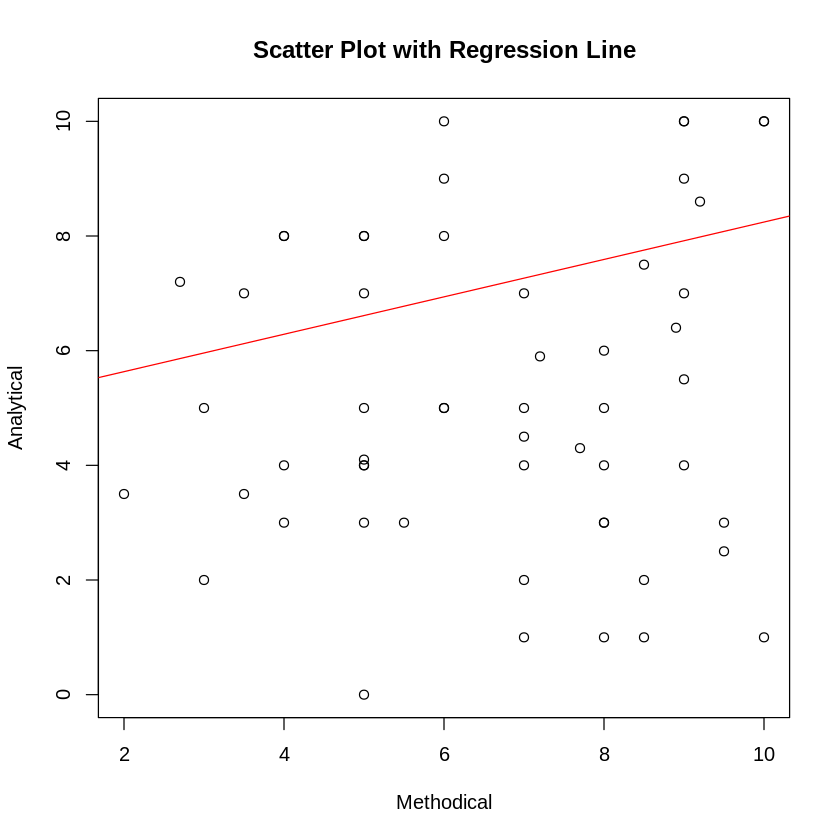

In [194]:
# Fit a linear regression model
model4 <- lm(Analytical ~ Methodical, data = filtered_data)

# Plot the scatter plot with the regression line
plot(filtered_data$Methodical, filtered_data$Introverted1,
     main = "Scatter Plot with Regression Line",
     xlab = "Methodical", ylab = "Analytical")
abline(model4, col = "red")

In [202]:
summary(model4)


Call:
lm(formula = Analytical ~ Methodical, data = filtered_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9392 -1.4231  0.4084  1.7346  3.0608 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.9819     0.9491   5.249 2.74e-06 ***
Methodical    0.3262     0.1357   2.403   0.0198 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.179 on 53 degrees of freedom
Multiple R-squared:  0.09828,	Adjusted R-squared:  0.08127 
F-statistic: 5.777 on 1 and 53 DF,  p-value: 0.01977


**Model 4 Summary:**
We conducted a linear regression analysis to predict "Analytical" based on "Methodical."
The model found a significant relationship (p < 0.05) between "Methodical" and "Analytical."
The coefficient for "Methodical" is 0.3262, indicating that for each unit increase in "Methodical," "Analytical" increases by 0.3262.
The model explains about 9.83% of the variance in "Analytical."
Overall, the relationship is statistically significant (p = 0.0198), but the model's predictive power is limited.

**Model 5: Predicting Analytical ability based on rational trait of a student**



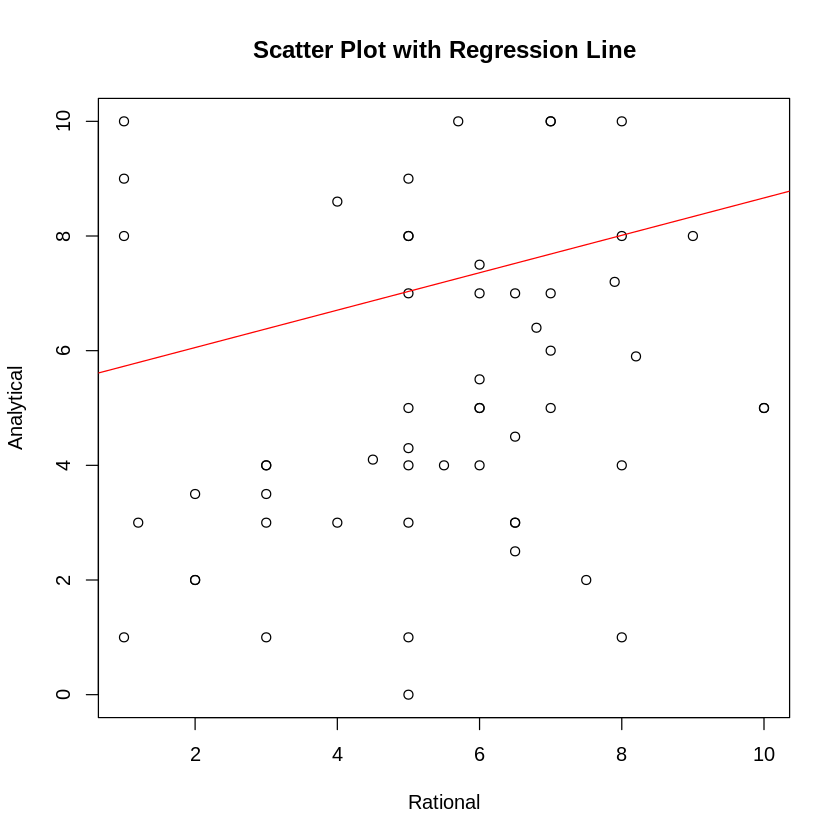

In [195]:
# Fit a linear regression model
model5 <- lm(Analytical ~ Rational, data = filtered_data)

# Plot the scatter plot with the regression line
plot(filtered_data$Rational, filtered_data$Introverted1,
     main = "Scatter Plot with Regression Line",
     xlab = "Rational", ylab = "Analytical")
abline(model5, col = "red")

In [203]:
summary(model5)


Call:
lm(formula = Analytical ~ Rational, data = filtered_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6860 -1.0123  0.1297  1.4534  4.2716 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.4021     0.7425   7.275 1.63e-09 ***
Rational      0.3263     0.1274   2.561   0.0133 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.164 on 53 degrees of freedom
Multiple R-squared:  0.1101,	Adjusted R-squared:  0.09335 
F-statistic:  6.56 on 1 and 53 DF,  p-value: 0.01331


**Model 5 Summary:**. We built a linear regression model to predict "Analytical" scores based on "Rational" scores.
The model suggests that for every one-unit increase in "Rational" scores, "Analytical" scores tend to increase by approximately 0.3263 points.
The model is statistically significant (p = 0.0133) and has an adjusted R-squared of 0.09335, indicating that it explains about 9.34% of the variability in "Analytical" scores.
The intercept is 5.4021, representing the expected "Analytical" score when "Rational" scores are zero.

##**Comparative analysis of 5 Models in Code:**

In [207]:
# Create and fit the five linear regression models
model <- lm(Analytical ~ Outgoing, data = filtered_data)
model2 <- lm(Analytical ~ Confident, data = filtered_data)
model3 <- lm(Analytical ~ Imaginative, data = filtered_data)
model4 <- lm(Analytical ~ Methodical, data = filtered_data)
model5 <- lm(Analytical ~ Rational, data = filtered_data)

# Calculate summary for each model
summary1 <- summary(model)
summary2 <- summary(model2)
summary3 <- summary(model3)
summary4 <- summary(model4)
summary5 <- summary(model5)

# Compare the summaries in form of comparison of adjusted R-squared
adjusted_r_sq <- c(
  summary1$adj.r.squared,
  summary2$adj.r.squared,
  summary3$adj.r.squared,
  summary4$adj.r.squared,
  summary5$adj.r.squared
)

# Find the model with the highest adjusted R-squared
best_index <- which.max(adjusted_r_sq)
best_r_squared <- adjusted_r_sq[best_index]

# Print the results
cat("Adjusted R-squared values:", adjusted_r_sq, "\n")
cat("Best model is Model", best_index, "with adjusted R-squared =", best_r_squared, "\n")


Adjusted R-squared values: 0.0890329 -0.01459998 -0.005365393 0.08126605 0.09335454 
Best model is Model 5 with adjusted R-squared = 0.09335454 


## Comparative analysis of 5 Models


**Model 1:**
Dependent Variable: Analytical
Independent Variable: Outgoing
Significant: Yes
R-squared: 0.106 (Small)
Interpretation: A unit increase in "Outgoing" is associated with an increase of 0.3101 units in "Analytical."

**Model 2:**
Dependent Variable: Analytical
Independent Variable: Confident
Significant: No
R-squared: 0.004 (Very small)
Interpretation: "Confident" does not significantly predict "Analytical."

**Model 3:**
Dependent Variable: Analytical
Independent Variable: Imaginative
Significant: No
R-squared: 0.013 (Very small)
Interpretation: "Imaginative" does not significantly predict "Analytical."

**Model 4:**
Dependent Variable: Analytical
Independent Variable: Methodical
Significant: Yes
R-squared: 0.098 (Small)
Interpretation: A unit increase in "Methodical" is associated with an increase of 0.3262 units in "Analytical."

**Model 5:**
Dependent Variable: Analytical
Independent Variable: Rational
Significant: Yes
R-squared: 0.110 (Small)
Interpretation: A unit increase in "Rational" is associated with an increase of 0.3263 units in "Analytical."

***In summary, Models 1, 4, and 5 show a significant relationship between certain traits (Outgoing, Methodical, and Rational) and the "Analytical" behavior, but the R-squared values suggest that these models only explain a small amount of the variation in "Analytical." Models 2 and 3 do not show a significant relationship with "Analytical," and their R-squared values are very small.***
***Therefore, Models 1, 4, and 5 seem to be better choices for predicting the "Analytical" variable compared to Models 2 and 3 due to their statistical significance and higher R-squared values.***



In [145]:
#Define the groups based on column names

social_traits <- c("Sociable1", "Sociable2", "Sociable3", "Sociable4", "Outgoing")
introverted_traits <- c("Introverted1", "Introverted2", "Introverted3")
emotional_traits <- c("Empathetic1", "Empathetic2", "Emotional", "Emotional2", "Moody")
cognitive_traits <- c("Imaginative", "Reflective", "Detail-Oriented", "Observant", "Creative", "Philosophical")
resilience_determination_traits <- c("Resilient", "Determined", "Confident", "Decisive1", "Decisive2")
rational_analytical_traits <- c("Rational", "Methodical", "Pragmatic", "Analytical", "Realistic", "Empirical")


#Group the columns based on the defined groups
grouped_data <- list(
  Social = filtered_data[, social_traits],
  Introverted = filtered_data[, introverted_traits],
  Emotional = filtered_data[, emotional_traits],
  Cognitive = filtered_data[, cognitive_traits],
  Resilience_Determination = filtered_data[, resilience_determination_traits],
  Rational_Analytical = filtered_data[, rational_analytical_traits]
)



## Multiple Regression Models

We have analysed few simple linear regression models. We will now try to see if we can increase accuracy of best models by adding more variables by way of performing multiple linear regression.

**Model A : Analytical abilities Vs Rational+ Methodical Traits**

We will create a multiple linear regression model in R using the 'lm' function. This model aims to predict the 'Analytical' variable based on 2 questions related to rational + methodical traits.


Call:
lm(formula = Analytical ~ Rational + Methodical, data = filtered_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5064 -1.5139  0.3035  1.4042  3.3873 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   2.7878     1.1463   2.432  0.01850 * 
Rational      0.3612     0.1201   3.008  0.00405 **
Methodical    0.3650     0.1271   2.871  0.00590 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.03 on 52 degrees of freedom
Multiple R-squared:  0.2319,	Adjusted R-squared:  0.2024 
F-statistic:  7.85 on 2 and 52 DF,  p-value: 0.001049


`geom_smooth()` using formula = 'y ~ x'


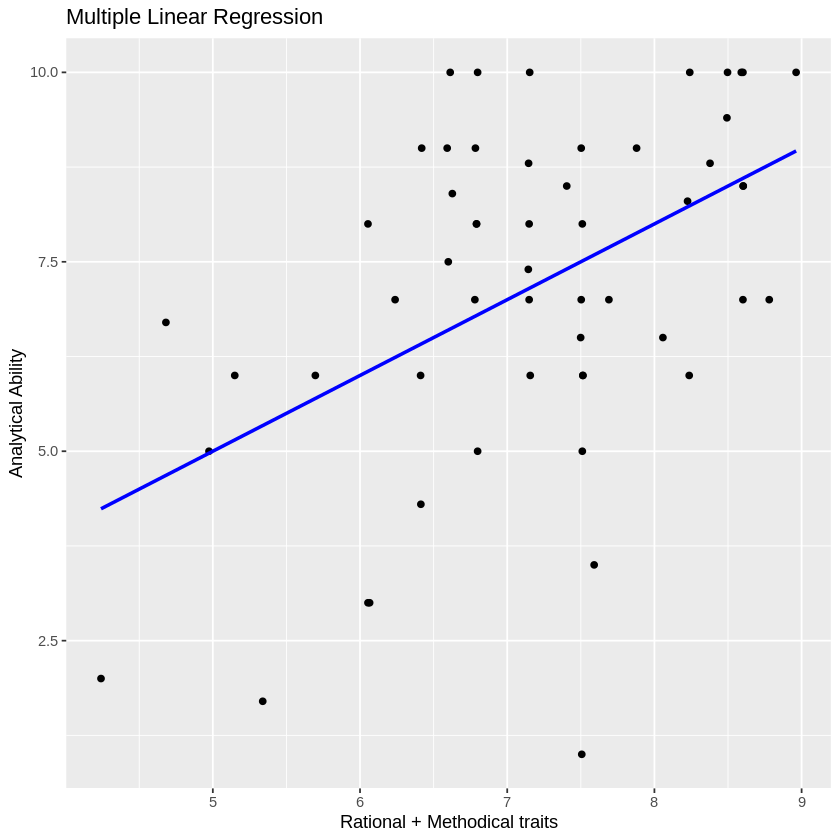

In [210]:
library(ggplot2)

# Create the multiple linear regression model
model <- lm(Analytical ~ Rational + Methodical, data = filtered_data)

# Summary of the regression model
summary(model)

# Plot the regression results using ggplot2
# We'll create a scatterplot of the observed vs. predicted values
ggplot(filtered_data, aes(x = predict(model), y = Analytical)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Multiple Linear Regression", x = "Rational + Methodical traits", y = "Analytical Ability")


**Model B : Analytical abilities vs Rational + Methodical + Philosophical Abilities Traits**

We will create a multiple linear regression model in R using the 'lm' function. This model aims to predict the 'Analytical' variable based on 3 questions related to positive rational + methodical + philosophical traits.


Call:
lm(formula = Analytical ~ Rational + Methodical + Philosophical, 
    data = filtered_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9433 -1.1628  0.1454  1.6242  2.8493 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)     0.9451     1.5413   0.613  0.54248   
Rational        0.3825     0.1184   3.230  0.00217 **
Methodical      0.3948     0.1258   3.137  0.00283 **
Philosophical   0.2380     0.1362   1.748  0.08653 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.991 on 51 degrees of freedom
Multiple R-squared:  0.2753,	Adjusted R-squared:  0.2327 
F-statistic: 6.459 on 3 and 51 DF,  p-value: 0.0008628


`geom_smooth()` using formula = 'y ~ x'


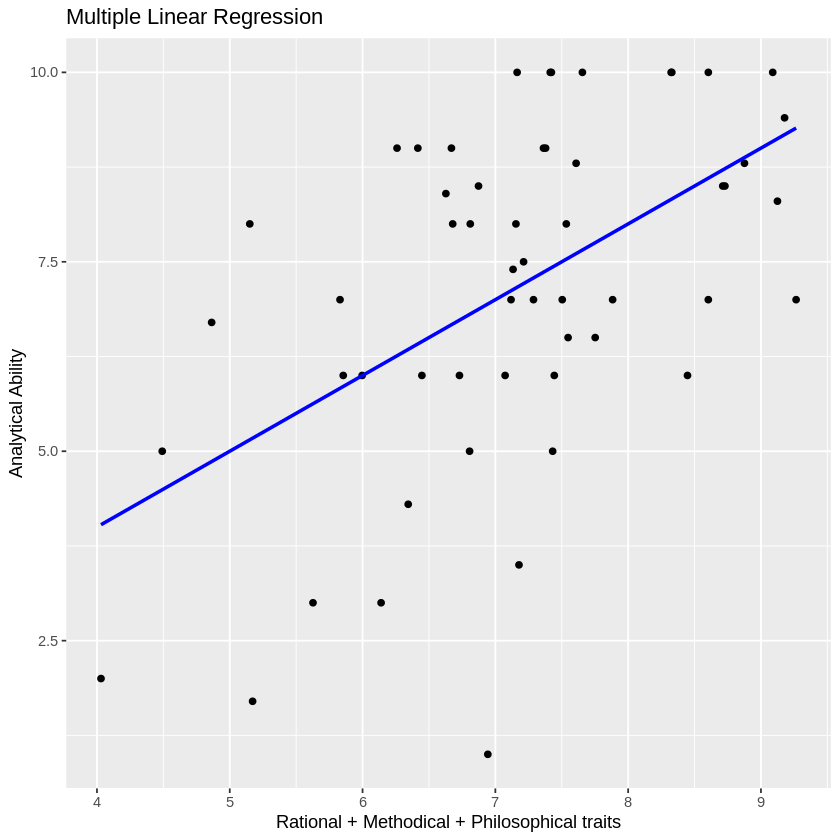

In [213]:
library(ggplot2)

# Create the multiple linear regression model
model <- lm(Analytical ~ Rational + Methodical + Philosophical, data = filtered_data)

# Summary of the regression model
summary(model)

# Plot the regression results using ggplot2
# We'll create a scatterplot of the observed vs. predicted values
ggplot(filtered_data, aes(x = predict(model), y = Analytical)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Multiple Linear Regression", x = "Rational + Methodical + Philosophical traits", y = "Analytical Ability")


**Model C : Analytical abilities Vs Rational + Methodical + Philosophical + Realistic Traits**

We will create a multiple linear regression model in R using the 'lm' function. This model aims to predict the 'Analytical' variable based on 4 questions related to positive rational + methodical + philosophical traits + ability to remain realistic.


Call:
lm(formula = Analytical ~ Rational + Methodical + Philosophical + 
    Realistic, data = filtered_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6217 -1.3621 -0.0174  1.4342  3.0330 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)     2.1268     1.8007   1.181  0.24316   
Rational        0.3931     0.1181   3.329  0.00164 **
Methodical      0.3921     0.1252   3.133  0.00289 **
Philosophical   0.2182     0.1364   1.600  0.11591   
Realistic      -0.1744     0.1394  -1.251  0.21692   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.98 on 50 degrees of freedom
Multiple R-squared:  0.2973,	Adjusted R-squared:  0.2411 
F-statistic: 5.288 on 4 and 50 DF,  p-value: 0.001245


`geom_smooth()` using formula = 'y ~ x'


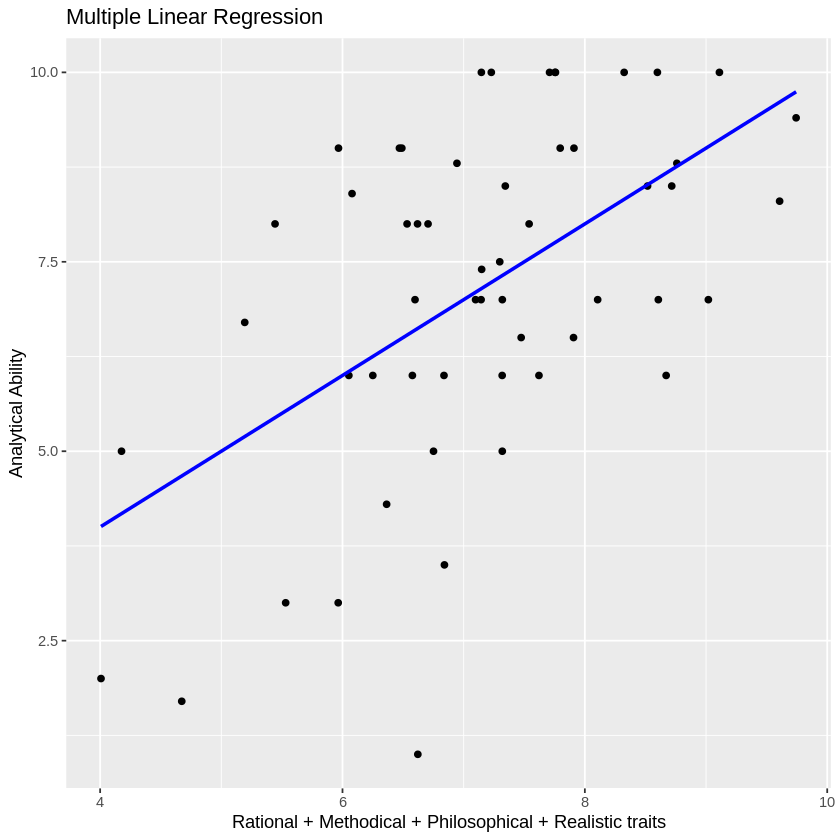

In [214]:
library(ggplot2)

# Create the multiple linear regression model
model <- lm(Analytical ~ Rational + Methodical + Philosophical + Realistic , data = filtered_data)

# Summary of the regression model
summary(model)

# Plot the regression results using ggplot2
# We'll create a scatterplot of the observed vs. predicted values
ggplot(filtered_data, aes(x = predict(model), y = Analytical)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Multiple Linear Regression", x = "Rational + Methodical + Philosophical + Realistic traits", y = "Analytical Ability")


## Comparative Final Summary of models

**Model 5:(Simple Linear Regression)**
R-squared (Multiple R-squared): 0.1101
Adjusted R-squared: 0.09335
F-statistic: 6.56, p-value: 0.0133

**Model A:**
R-squared: 0.2319
Adjusted R-squared: 0.2024
F-statistic: 7.85
Residual standard error: 2.03

**Model B:**
R-squared: 0.2753
Adjusted R-squared: 0.2327
F-statistic: 6.459
Residual standard error: 1.991

**Model C:**
R-squared: 0.2973
Adjusted R-squared: 0.2411
F-statistic: 5.288
Residual standard error: 1.98
Now, let's interpret the results:

**R-squared:**
R-squared measures the proportion of the variance in the dependent variable that is explained by the independent variables. Higher R-squared values indicate better model fit. **Model C has the highest R-squared (0.2973), indicating that it explains the most variance in the target variable, "Analytical ability"**

**Adjusted R-squared:** Adjusted R-squared considers the number of predictors in the model. It penalizes the addition of less useful predictors. Model C still has the highest adjusted R-squared (0.2411), but it's slightly lower than its R-squared, suggesting that it might be overfitting the data.

**F-statistic:**
The F-statistic tests whether the overall model is statistically significant. Lower p-values indicate a more significant model. All three models have low p-values, but Model A has the highest F-statistic (7.85).

**Residual standard error:**
This measures the spread of residuals around the regression line. A lower value indicates better fit. Model C has the lowest residual standard error (1.98), suggesting it has the best fit among the three models.

***Among these models, Model C has the highest R-squared value (0.2973), indicating that it explains the most variance in the target variable, "Analytical Abilities"***
Model C also has a statistically significant F-statistic and individual predictor coefficients (Rational and Methodical), which suggests that the model is a good fit for the data.
However, Model B also performs well, with a relatively high R-squared value (0.2753) and statistically significant predictors.
Model A has a lower R-squared value compared to Models B and C.
Model 5(simple linear regression), with only the "Rational" predictor, has the lowest R-squared value and explains the least amount of variance.


## Recommendations



**Importance of Predicting Analytical Abilities:**
Predicting analytical abilities is crucial for the San Francisco County Office of Education's Psychology Department as it allows for a deeper understanding of student behaviors and characteristics.
This prediction can serve as a valuable tool to enhance the quality of counseling services provided to college students, fostering their academic success and personal growth.
Model Selection:

**Among the considered models, Model C (Analytical ~ Rational + Methodical + Philosophical + Realistic) is the most suitable choice.
It explains a significant amount of variance in analytical behavior, making it a robust predictive model.
The model includes multiple predictors that are highly relevant to analytical abilities, ensuring its accuracy.**

**Implementation Considerations:**
Prior to deploying Model C for practical applications, it's crucial to align it with the specific goals and objectives of the Psychology Department.
Further evaluation and validation of the model's performance are necessary, potentially through external data or cross-validation techniques.

Real-World Complexity as real-world behavior is influenced by diverse factors beyond those incorporated into these models. This necessitates ongoing research and data collection efforts to continually refine and improve predictive accuracy. Future iterations of the model may need to consider additional variables and factors to provide a comprehensive understanding of student behavior.

In conclusion, predicting analytical abilities was chosen because it directly impacts students' academic success and personal growth. Model C offers promise in achieving this goal, but its practical implementation must be tailored to departmental objectives and rigorously validated. Acknowledging the complexity of real-world behavior, ongoing research and data collection will be essential to ensure the accuracy and effectiveness of the predictive model. Ultimately, through this project we sincerely hope to empower college counselors to better assist students in reaching their full potential.